In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2
import os
import numpy as np


In [15]:
data_generator = ImageDataGenerator(rescale=1/255)

print('<Train 데이터>')
train_generator = data_generator.flow_from_directory(
    './Dataset/Train',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

print('<Test 데이터>')
test_generator = data_generator.flow_from_directory(
    './Dataset/Test',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
print('<Validation 데이터>')
validation_generator = data_generator.flow_from_directory(
    './Dataset/Validation',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

<Train 데이터>
Found 160000 images belonging to 2 classes.
<Test 데이터>
Found 1 images belonging to 1 classes.
<Validation 데이터>
Found 22598 images belonging to 2 classes.


In [ ]:
data_generator = ImageDataGenerator(rescale=1/255)

print('<Train 데이터>')
train_generator = data_generator.flow_from_directory(
    './Dataset/Train',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
print('<Test 데이터>')
test_generator = data_generator.flow_from_directory(
    './Dataset/Test',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
print('<Validation 데이터>')
validation_generator = data_generator.flow_from_directory(
    './Dataset/Validation',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (256,256,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])


In [17]:
hist = model.fit(train_generator, steps_per_epoch= 13, epochs=30, batch_size=32, validation_data=test_generator, validation_steps = 7)

Epoch 1/30
13/13 [==============================] - 7s 539ms/step - loss: 1.8166 - accuracy: 0.5240 - val_loss: 1.1912 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 7s 518ms/step - loss: 0.5839 - accuracy: 0.6755 - val_loss: 1.1994 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 7s 525ms/step - loss: 0.5615 - accuracy: 0.7500 - val_loss: 1.5899 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 7s 522ms/step - loss: 0.4927 - accuracy: 0.7692 - val_loss: 1.1090 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 7s 527ms/step - loss: 0.5039 - accuracy: 0.7572 - val_loss: 1.7226 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 7s 530ms/step - loss: 0.4755 - accuracy: 0.7740 - val_loss: 1.6109 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 7s 528ms/step - loss: 0.4123 - accuracy: 0.8365 - val_loss: 1.7308 - val

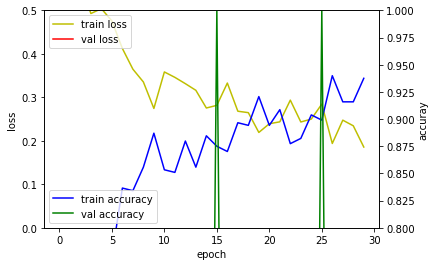

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
loss_and_metrics = model.evaluate(validation_generator, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

707/707 [==============================] - 111s 158ms/step - loss: 0.2094 - accuracy: 0.9179
## evaluation loss and_metrics ##
[0.20944558084011078, 0.9178688526153564]


In [11]:
model.save('./check_gender.h5')

In [3]:
model = load_model('./check_gender.h5')

In [22]:
# img = cv2.imread('./Dataset/predict/1.jpg')

In [20]:

data_path = './Dataset/predict/*.jpg'
img = cv2.imread(data_path)
# img_name = os.path.basename(data_path)
# img_name = os.listdir(data_path)

print("-- Predict --")
output = model.predict_generator(validation_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_generator.class_indices)
# print(output)

-- Predict --


ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [27]:
%whos

Variable               Type                  Data/Info
------------------------------------------------------
Activation             type                  <class 'tensorflow.python<...>.layers.core.Activation'>
Conv2D                 type                  <class 'tensorflow.python<...>rs.convolutional.Conv2D'>
Dense                  type                  <class 'tensorflow.python<...>keras.layers.core.Dense'>
Flatten                type                  <class 'tensorflow.python<...>ras.layers.core.Flatten'>
ImageDataGenerator     type                  <class 'tensorflow.python<...>mage.ImageDataGenerator'>
MaxPooling2D           type                  <class 'tensorflow.python<...>rs.pooling.MaxPooling2D'>
Sequential             type                  <class 'tensorflow.python<...>e.sequential.Sequential'>
cv2                    module                <module 'cv2.cv2' from 'D<...>\cv2.cp36-win_amd64.pyd'>
data_generator         ImageDataGenerator    <tensorflow.python.keras.<...>ct at 0